<a href="https://colab.research.google.com/github/SUMIT74184/Machine-learning-journey/blob/main/pytorchWorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

Let's explore an example pytorch end-to-end

`data (prepare and load)`

`build the model`

`Fiiting the model to data (training)`

`Making predictions and evaluating a model (inference)`

`saving and loading a model`

`putting it all together`


In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt


## Data preparing and loading

Data can be anything.... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos(youtube)
* Audio(songs or podcasts)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representaion
2. Build a model to learn pattern in that numerical representaion

we'll use a linear regression forrmula to make straight line with know **parameters**

In [8]:
## Create Known parameters
weight=0.7
bias =0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:5] , y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [9]:
len(X),len(y)

(50, 50)

## Splitting the data into Training set and Test sets (one of the most important concepts)

Let's create the training set and test set with our data

In [10]:
# Create a train/test
train_split=int(0.8 * len(X))

X_train,y_train= X[:train_split], y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [11]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

How might we better visulize our data?


In [12]:
torch.__version__

'2.9.0+cpu'

In [13]:
from prompt_toolkit.shortcuts.progress_bar import Label
# X_train,y_train
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))

  #PLot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #Plot test data in gree
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

  #Show the legend
  plt.legend(prop={"size":14});


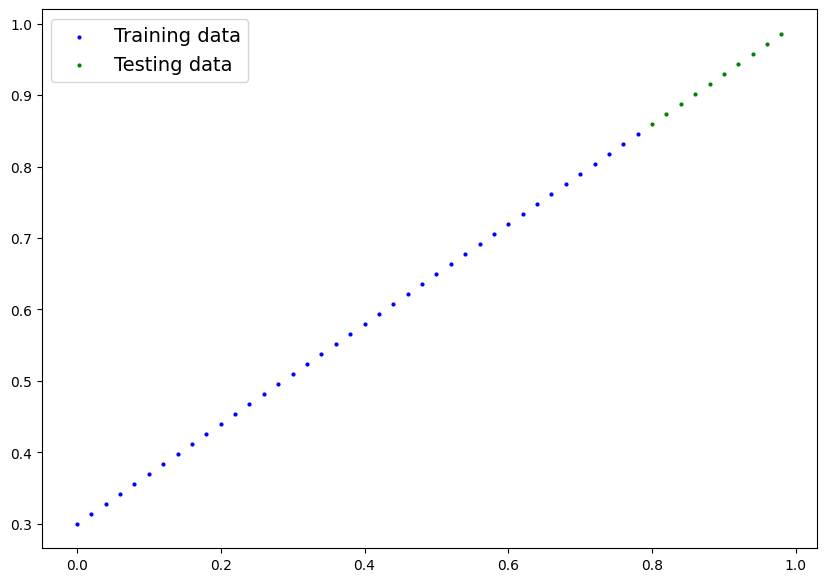

In [14]:
plot_predictions()

## Create the first model in machine learning(pytorch)

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) to the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:

1.Gradient descent

2.Backpropagation

In [15]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everthing in pytorch
 def __init__(self):
   super().__init__()
   self.weight= nn.Parameter(torch.rand(1, # start with a random weight and try to adjust it to the ideal weights
                                        requires_grad=True, # can this parameter be updated via gradient descent?
                                        dtype=torch.float))
   self.bias=nn.Parameter(torch.rand(1, # start with a random bias and try to adjust it to the ideal bias
                                     requires_grad=True,
                                     dtype=torch.float))

   # Forward method to define the computation in the model---need to define

 def forward(self,x:torch.Tensor)->torch.Tensor: # x is the input data
  return self.weight * x + self.bias # This is the linear regression formula


# (Build) Some important model in pytorch

pytorch model building essentials
* torch.nn - contains all of the buildings for computational graphs ( a neural network)
* torch.nn.Parameter - what parameters should our model try and learn , often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules,if you subclass it,you should overwrite forward()
* torch.optim - This is where the optimizers in Pytorch live, they will help with gradient descent(genrally help us to improve our algorithms)
* def forward() -All nn.Module subClasses

In [16]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checking the contents of our pytorch model

Now we've created a model, let's see what's inside ...

So we can check our model parameters or whats inside our model using .parameterS()

In [17]:
#Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using `torch.inference_model()`

To check our model's predictive power,let's see how well it predicts `y_test` based on `X_Test` .

Wehn we pass data through our model, ist going to run it through the forward() method


In [19]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
# we can also use this manual way
y_preds=model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [21]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# with torch.no_grad():
#   y_preds=model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [22]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

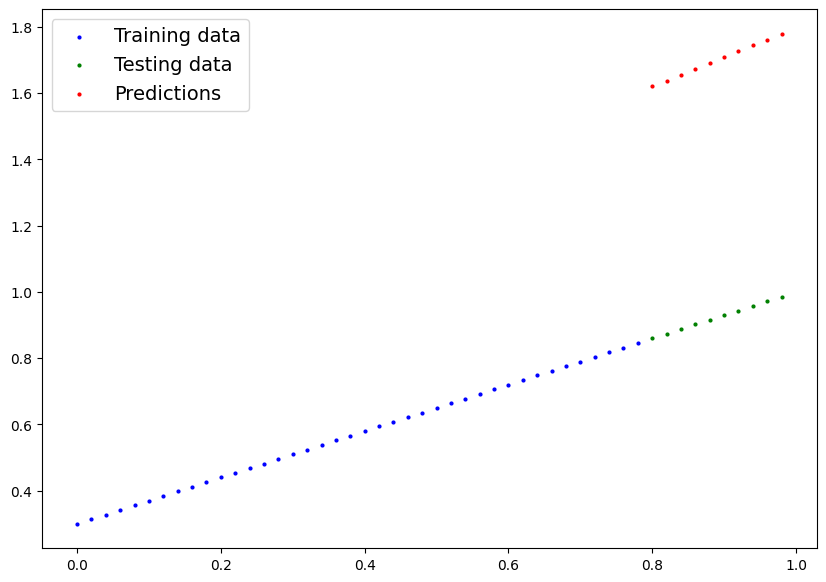

In [23]:
plot_predictions(predictions=y_preds)

## Train a Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *Know* parameter

Or in other words from a poor representation of data to a better representation of the data

One way to measure how poor or how wrong your models predictions are use of **Loss functions**

Note:cost function may also be called cost function or criterion in different areas.

Things we need to train:

* **Loss function** : A function to measure how wrong your model' predictions are to the ideal outputs, lower is better

* **Optimizer** : Takes into account the loss of a model and adjusts the model's parameters (eg.weight & bias)
In our case to improve the loss function
  
  * Inside the optimizer you'll often have to set two parameters:
     
     * params - the model parameters you'd like to optimize, for example params=`model_0.paramters()`
     * lr(Learning Rate) - The learning rate is a hyperparameter that defines how big/small the optmizer changes the parameters with each step ( a small `lr` results in small changes, al large `lr` result in large changes)

And specifically for pytorch, we need:

* A training loop
* A testing loop


In [24]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [25]:
# check out our model's parameters (a paramter is a value that model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [26]:
# Setup a loss function
Loss_fn =  nn.L1Loss()

# Setup an optmiser (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) # increase learning rate

### Buildiing a Training Loop and Testing Loop in pytorch

A couple of things we need in a training loop:

0. Loop through the data

1. Forward pass (this involves data moving through our model's using forward())-- also called forward propagation

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backwards -  move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backPropagation**)

5. Optimizer step - use the optimizers to adjust out model's parmeters to try and improve the loss (**gradient descent**)

In [27]:
# with torch.inference_mode():
#   list(model_0.parameters())

In [28]:
torch.manual_seed(42)

# An epochs is one loop through the data....( this is a hyperparameter because we've set in)
epochs = 200

#Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

### Training
# steps 0
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred=model_0(X_train)

  # 2. Calculate the loss
  loss=Loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the models
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optmizer changes will acculmulate through the loop so... we have to zero them above in step 3

  #Testing
  model_0.eval() # turns off gradient tracking


  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking & couple more things behind the scenes
    # 1 do the forward path
    test_pred = model_0(X_test)

    # 2. calculate the lost
    test_loss=Loss_fn(test_pred,y_test)

# print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | loss: {loss} | Test Loss : {test_loss}")
    print(model_0.state_dict())

print(model_0.state_dict())


Loss: 0.6860889196395874
Epoch: 0 | loss: 0.6860889196395874 | Test Loss : 0.7637526988983154
OrderedDict({'weight': tensor([0.8784]), 'bias': tensor([0.9050])})
Loss: 0.6745679974555969
Loss: 0.6630470156669617
Loss: 0.6515260338783264
Loss: 0.6400049924850464
Loss: 0.6284840703010559
Loss: 0.6169630289077759
Loss: 0.6054420471191406
Loss: 0.5939210653305054
Loss: 0.5824000239372253
Loss: 0.5708791017532349
Epoch: 10 | loss: 0.5708791017532349 | Test Loss : 0.6290428042411804
OrderedDict({'weight': tensor([0.8394]), 'bias': tensor([0.8050])})
Loss: 0.5593580603599548
Loss: 0.5478371381759644
Loss: 0.5363161563873291
Loss: 0.5247951149940491
Loss: 0.5132741332054138
Loss: 0.5017532110214233
Loss: 0.4902321696281433
Loss: 0.47871121764183044
Loss: 0.4671902060508728
Loss: 0.45566922426223755
Epoch: 20 | loss: 0.45566922426223755 | Test Loss : 0.4943329691886902
OrderedDict({'weight': tensor([0.8004]), 'bias': tensor([0.7050])})
Loss: 0.4441482126712799
Loss: 0.43262726068496704
Loss: 0.

In [29]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

/tmp/ipython-input-3093526640.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  np.array(torch.tensor(loss_values).numpy()),test_loss_values


(array([0.6860889 , 0.5708791 , 0.45566922, 0.34045935, 0.22524948,
        0.11003961, 0.00972499, 0.00621675, 0.00278832, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595,
        0.00709595, 0.00709595, 0.00709595, 0.00709595, 0.00709595],
       dtype=float32),
 [tensor(0.7638),
  tensor(0.6290),
  tensor(0.4943),
  tensor(0.3596),
  tensor(0.2249),
  tensor(0.0902),
  tensor(0.0210),
  tensor(0.0141),
  tensor(0.0058),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075)])

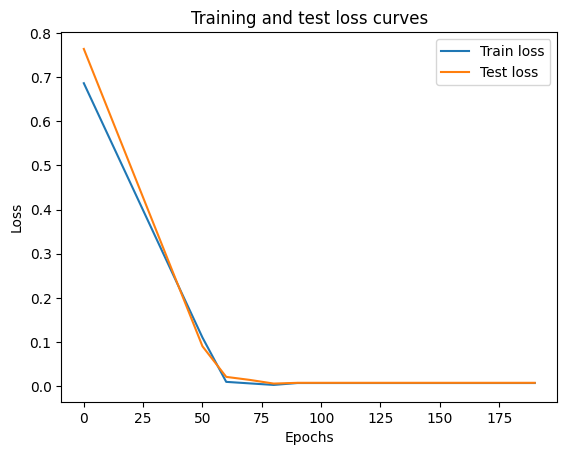

In [30]:
#Plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [31]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [32]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [33]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

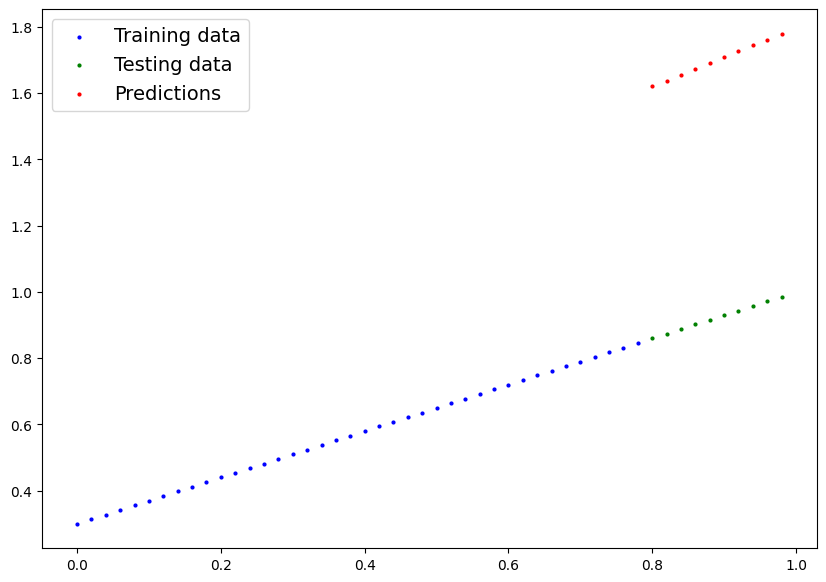

In [34]:
plot_predictions(predictions=y_preds)

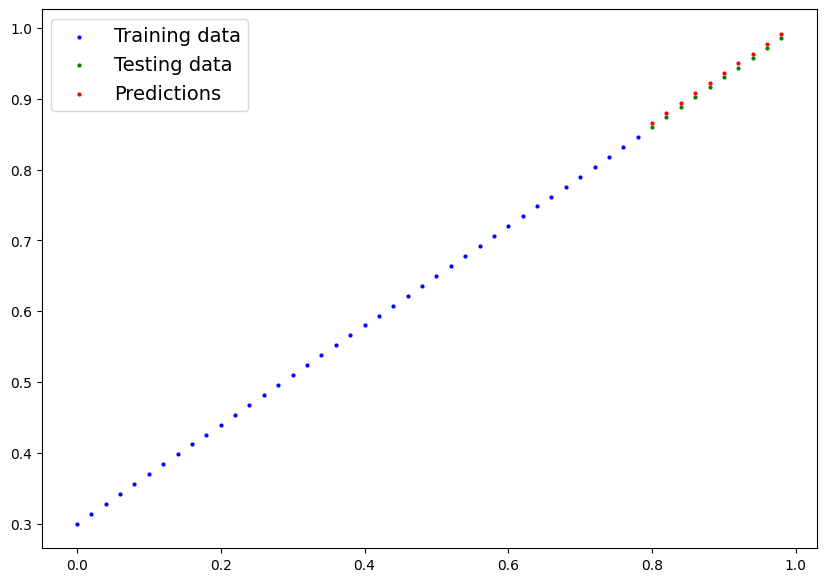

In [35]:
plot_predictions(predictions=y_preds_new)

In [36]:
torch.device('cpu')

device(type='cpu')

## Saving a model in Pytorch

There are three main methods you should know about for saving and loading models in Pytorch.

1.`torch.save()` - allow you save Pytorch object in Python's pickle format

2.`torch.load()` - allows you load a saved Pytorch object

3.`torch.nn.Module.load_state_dict()` - This allows to load a model's saved state dictionary

In [37]:
# Saving out Pytorch model
from pathlib import Path


# 1. Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH
)



Saving model to:models/01_pytorch_workflow_model_0.pth


In [38]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2117 Dec 16 17:22 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we have save out model's `state_dict()` rather the entire model, we'll create a new instance of out model class and load the saved `state_dict()` into that

In [39]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [40]:
# To load in saved state_dict() we have to instantiate a new instance of out model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 ( this will update the new instance with updated parameter)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [41]:
loaded_model_0.state_dict() #Loaded values

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [42]:
loaded_model_0.state_dict() #previos values (optional just for the references)

OrderedDict([('weight', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [43]:
# Make some Predictions with out loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [44]:
loaded_model_preds


tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [45]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [46]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#6. Putting it all together

Let's go back and through the steps above and see it all in one place

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using GPU

In [47]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


###6.1 Data

In [54]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## check the version
torch.__version__

'2.9.0+cpu'

In [55]:
# Create some data using the linear regression of y= wieght * x + bias
weight=0.7
bias=0.3

# Create range values

start = 0
end =1
step=0.02

# Create X and y (features and labels)
X=torch.arange(start,end,step).unsqueeze(dim=1)

y=weight * X + bias

X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [56]:

# Split the data
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

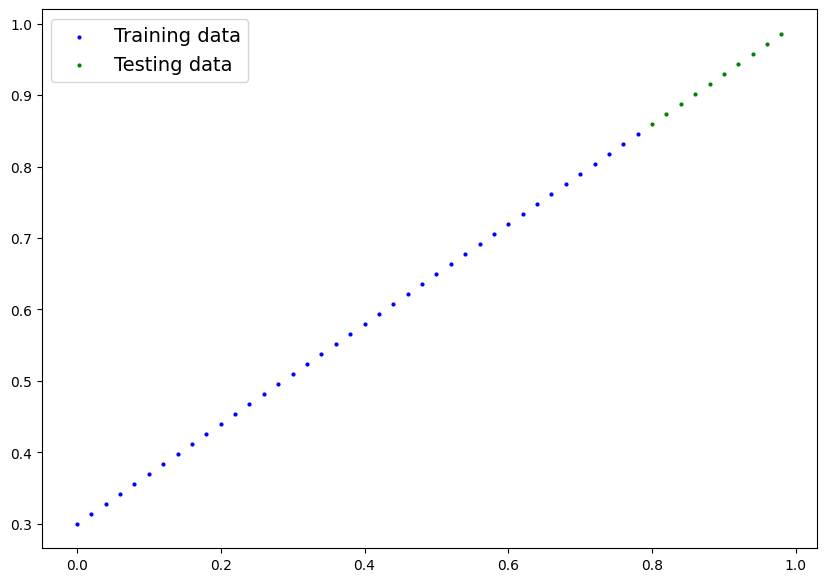

In [57]:
#Plot the data
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a pytorch model

In [67]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters also called linear regression , probing
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1
                                  )
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [68]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [69]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

###6.3 Training

For training we need:
* Loss function
* OPtimizer
* Training loop
* Testing loop

In [76]:
# Setup loss function
loss_fn = nn.L1Loss()


# Setup our optmizers
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01,)


# Let's write a training loop
torch.manual_seed(42)


epochs = 300

for epoch in range(epochs):

  model_1.train()

  # 1 Forward pass
  y_pred= model_1(X_train)

  # 2 Calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3 Optimizers
  optimizer.zero_grad()

  # 4 perform backpropagation
  loss.backward()

  # 5
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  #print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}  | loss:{loss} | Test loss : {test_loss}")



Epoch:0  | loss:0.05761392042040825 | Test loss : 0.004697286989539862
Epoch:10  | loss:0.01828731968998909 | Test loss : 0.04110542684793472
Epoch:20  | loss:0.014825659804046154 | Test loss : 0.03420664742588997
Epoch:30  | loss:0.011397214606404305 | Test loss : 0.02593410015106201
Epoch:40  | loss:0.007959015667438507 | Test loss : 0.017661571502685547
Epoch:50  | loss:0.004523725714534521 | Test loss : 0.010075909085571766
Epoch:60  | loss:0.0019979639910161495 | Test loss : 0.0058179437182843685
Epoch:70  | loss:0.004472500644624233 | Test loss : 0.0058179437182843685
Epoch:80  | loss:0.004472500644624233 | Test loss : 0.0058179437182843685
Epoch:90  | loss:0.004472500644624233 | Test loss : 0.0058179437182843685
Epoch:100  | loss:0.004472500644624233 | Test loss : 0.0058179437182843685
Epoch:110  | loss:0.004472500644624233 | Test loss : 0.0058179437182843685
Epoch:120  | loss:0.004472500644624233 | Test loss : 0.0058179437182843685
Epoch:130  | loss:0.004472500644624233 | Test 

In [77]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6936]])),
             ('linear_layer.bias', tensor([0.2980]))])

In [78]:
weight,bias

(0.7, 0.3)

### 6.4 Making and evalauting predictions



In [79]:
model_1.eval()


# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8529],
        [0.8668],
        [0.8807],
        [0.8945],
        [0.9084],
        [0.9223],
        [0.9362],
        [0.9500],
        [0.9639],
        [0.9778]])

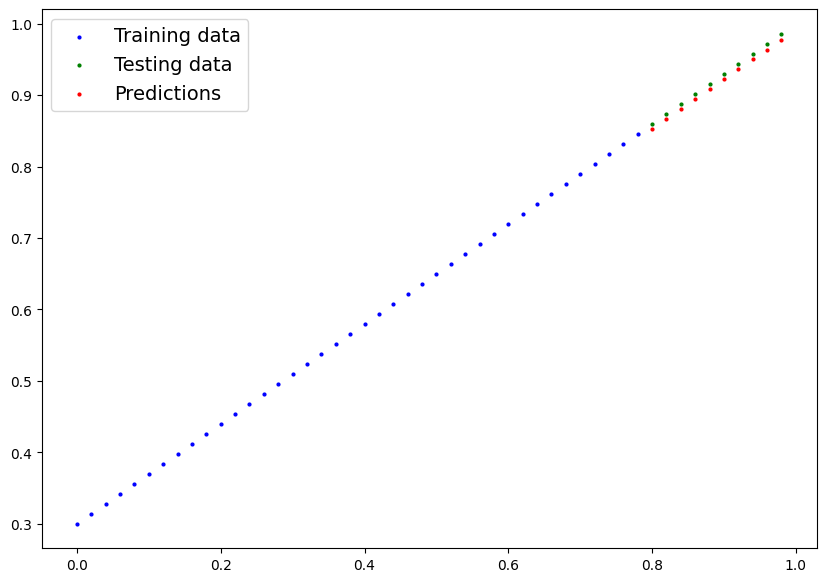

In [80]:
plot_predictions(predictions=y_preds)

### 6.5 Saving & Loading model

In [86]:
from pathlib import Path

# Create model directory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#Create model save path
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# MODEL_SAVE_PATH
print(f"Saving mode to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH
           )

Saving mode to:models/01_pytorch_workflow_model_1.pth


In [88]:
# Load a pytorch
#Create a new instance of linear regression model v2
loaded_model_1=LinearRegressionModelV2()

In [89]:
#Load the saved model_1 state_Dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [90]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6936]])),
             ('linear_layer.bias', tensor([0.2980]))])

In [91]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])